In [3]:
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def read_file(location):
    with open(os.path.expanduser(location), "r") as file:
        return pd.read_csv(file, sep=",")

In [5]:
df = read_file("/Users/guillermocomesanacimadevila/double_dipping/Data/CRyPTIC_reuse_table_20221019.csv")

In [6]:
df # need to sort this shit out

,UNIQUEID,AMI_BINARY_PHENOTYPE,BDQ_BINARY_PHENOTYPE,CFZ_BINARY_PHENOTYPE,DLM_BINARY_PHENOTYPE,EMB_BINARY_PHENOTYPE,ETH_BINARY_PHENOTYPE,INH_BINARY_PHENOTYPE,KAN_BINARY_PHENOTYPE,LEV_BINARY_PHENOTYPE,...,INH_PHENOTYPE_QUALITY,KAN_PHENOTYPE_QUALITY,LEV_PHENOTYPE_QUALITY,LZD_PHENOTYPE_QUALITY,MXF_PHENOTYPE_QUALITY,RIF_PHENOTYPE_QUALITY,RFB_PHENOTYPE_QUALITY,ENA_SAMPLE,VCF,REGENOTYPED_VCF
0,site.02.subj.0001.lab.2014222001.iso.1,S,NaN,S,S,S,S,S,S,S,...,HIGH,HIGH,HIGH,HIGH,HIGH,HIGH,HIGH,ERS5298516,00/01/08/61/10861/site.02.iso.1.subject.0001.l...,00/01/08/61/10861/site.02.iso.1.subject.0001.l...
1,site.02.subj.0002.lab.2014222005.iso.1,S,S,S,S,S,S,S,S,S,...,HIGH,HIGH,HIGH,HIGH,LOW,HIGH,HIGH,ERS5298518,00/01/08/63/10863/site.02.iso.1.subject.0002.l...,00/01/08/63/10863/site.02.iso.1.subject.0002.l...
2,site.02.subj.0004.lab.2014222010.iso.1,S,S,S,NaN,S,I,S,S,S,...,HIGH,HIGH,HIGH,HIGH,HIGH,HIGH,HIGH,ERS5298520,00/01/08/67/10867/site.02.iso.1.subject.0004.l...,00/01/08/67/10867/site.02.iso.1.subject.0004.l...
3,site.02.subj.0005.lab.2014222011.iso.1,S,S,S,S,S,S,S,S,S,...,HIGH,HIGH,HIGH,HIGH,HIGH,HIGH,HIGH,ERS5298521,00/01/08/68/10868/site.02.iso.1.subject.0005.l...,00/01/08/68/10868/site.02.iso.1.subject.0005.l...
4,site.02.subj.0006.lab.2014222013.iso.1,S,S,S,S,S,S,S,S,S,...,HIGH,HIGH,HIGH,HIGH,HIGH,HIGH,HIGH,ERS5298522,00/01/08/69/10869/site.02.iso.1.subject.0006.l...,00/01/08/69/10869/site.02.iso.1.subject.0006.l...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12283,site.20.subj.SCH8604398.lab.YA00134621.iso.1,S,S,S,S,S,S,S,S,S,...,HIGH,HIGH,LOW,HIGH,LOW,HIGH,HIGH,ERS6421619,00/02/83/85/28385/site.20.iso.1.subject.SCH860...,00/02/83/85/28385/site.20.iso.1.subject.SCH860...
12284,site.20.subj.SCH8604399.lab.YA00134971.iso.1,S,S,S,S,S,S,S,S,S,...,HIGH,LOW,HIGH,HIGH,LOW,LOW,HIGH,ERS6421664,00/02/84/35/28435/site.20.iso.1.subject.SCH860...,00/02/84/35/28435/site.20.iso.1.subject.SCH860...
12285,site.20.subj.SCH8608291.lab.YA00135762.iso.1,S,S,S,S,R,R,R,S,R,...,HIGH,HIGH,HIGH,NaN,LOW,HIGH,HIGH,ERS6421689,00/02/85/60/28560/site.20.iso.1.subject.SCH860...,00/02/85/60/28560/site.20.iso.1.subject.SCH860...
12286,site.20.subj.SCH8608295.lab.YA00134623.iso.1,S,S,S,S,S,S,S,S,S,...,HIGH,HIGH,LOW,HIGH,LOW,HIGH,HIGH,ERS6421620,00/02/83/86/28386/site.20.iso.1.subject.SCH860...,00/02/83/86/28386/site.20.iso.1.subject.SCH860...


In [7]:
df.columns

Index(['UNIQUEID', 'AMI_BINARY_PHENOTYPE', 'BDQ_BINARY_PHENOTYPE',
       'CFZ_BINARY_PHENOTYPE', 'DLM_BINARY_PHENOTYPE', 'EMB_BINARY_PHENOTYPE',
       'ETH_BINARY_PHENOTYPE', 'INH_BINARY_PHENOTYPE', 'KAN_BINARY_PHENOTYPE',
       'LEV_BINARY_PHENOTYPE', 'LZD_BINARY_PHENOTYPE', 'MXF_BINARY_PHENOTYPE',
       'RIF_BINARY_PHENOTYPE', 'RFB_BINARY_PHENOTYPE', 'AMI_MIC', 'BDQ_MIC',
       'CFZ_MIC', 'DLM_MIC', 'EMB_MIC', 'ETH_MIC', 'INH_MIC', 'KAN_MIC',
       'LEV_MIC', 'LZD_MIC', 'MXF_MIC', 'RIF_MIC', 'RFB_MIC',
       'AMI_PHENOTYPE_QUALITY', 'BDQ_PHENOTYPE_QUALITY',
       'CFZ_PHENOTYPE_QUALITY', 'EMB_PHENOTYPE_QUALITY',
       'ETH_PHENOTYPE_QUALITY', 'INH_PHENOTYPE_QUALITY',
       'KAN_PHENOTYPE_QUALITY', 'LEV_PHENOTYPE_QUALITY',
       'LZD_PHENOTYPE_QUALITY', 'MXF_PHENOTYPE_QUALITY',
       'RIF_PHENOTYPE_QUALITY', 'RFB_PHENOTYPE_QUALITY', 'ENA_SAMPLE', 'VCF',
       'REGENOTYPED_VCF'],
      dtype='object')

In [8]:
df.shape

(12288, 42)

In [24]:
df["LZD_BINARY_PHENOTYPE"].isnull().sum() # load up into SQL

100

In [25]:
df["LZD_BINARY_PHENOTYPE"].unique()

array(['S', 'R', nan], dtype=object)

In [47]:
len([i for i in df["LZD_PHENOTYPE_QUALITY"] if i != "HIGH"])

5147

In [26]:
df2 = df[["LZD_BINARY_PHENOTYPE", "VCF", "LZD_PHENOTYPE_QUALITY"]].copy()

In [27]:
df2

,LZD_BINARY_PHENOTYPE,VCF,LZD_PHENOTYPE_QUALITY
0,S,00/01/08/61/10861/site.02.iso.1.subject.0001.l...,HIGH
1,S,00/01/08/63/10863/site.02.iso.1.subject.0002.l...,HIGH
2,S,00/01/08/67/10867/site.02.iso.1.subject.0004.l...,HIGH
3,S,00/01/08/68/10868/site.02.iso.1.subject.0005.l...,HIGH
4,S,00/01/08/69/10869/site.02.iso.1.subject.0006.l...,HIGH
...,...,...,...
12283,S,00/02/83/85/28385/site.20.iso.1.subject.SCH860...,HIGH
12284,S,00/02/84/35/28435/site.20.iso.1.subject.SCH860...,HIGH
12285,NaN,00/02/85/60/28560/site.20.iso.1.subject.SCH860...,NaN
12286,S,00/02/83/86/28386/site.20.iso.1.subject.SCH860...,HIGH


In [30]:
df3 = df2.loc[~df2["LZD_BINARY_PHENOTYPE"].isnull()]
df3 = df3.loc[df3["LZD_PHENOTYPE_QUALITY"] == "HIGH"]

In [33]:
df3["LZD_PHENOTYPE_QUALITY"].unique()

array(['HIGH'], dtype=object)

In [34]:
(df2.shape[0] - df3.shape[0]) # check that isna total = correct

5147

In [35]:
df3 # okay, here are all of the VCFs for where the drug = TRUE
df3 = df3.head(n=1000)
# parse onto a csv 
df3.to_csv("vcf_table.csv")

In [36]:
# parse to download all vcfs from that 
df3.shape # select only 1,000 but download VCFs

(1000, 3)

In [37]:
df3
df3.to_csv("vcf_drug.csv", index=False)

In [38]:
value_counts = df3["LZD_BINARY_PHENOTYPE"].value_counts()
value_counts

LZD_BINARY_PHENOTYPE
S    985
R     15
Name: count, dtype: int64

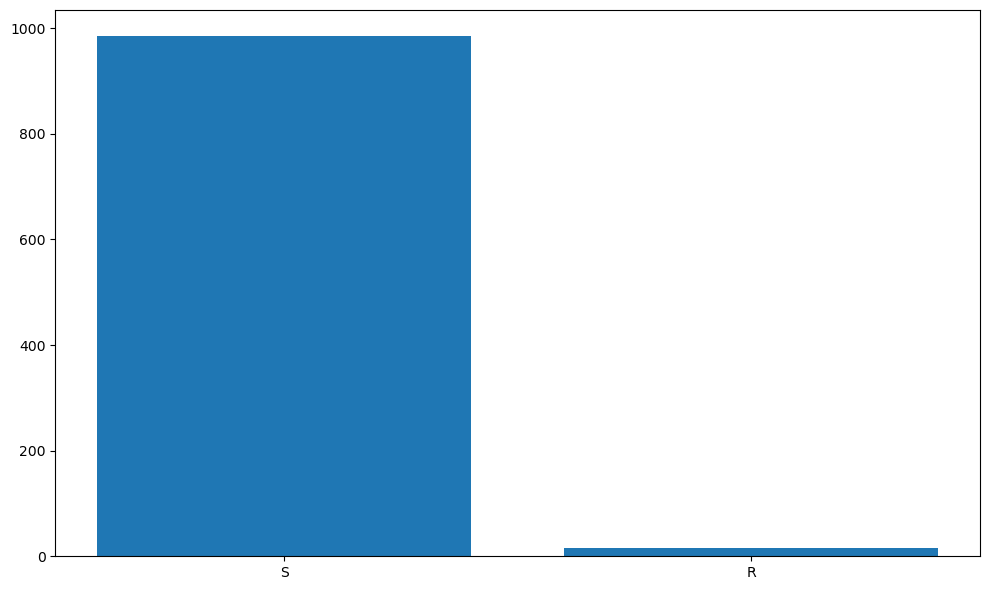

In [39]:
plt.figure(figsize=(10, 6))

plt.bar(value_counts.index, value_counts.values)
plt.tight_layout()
plt.show()

In [40]:
df["REGENOTYPED_VCF"] [0]

'00/01/08/61/10861/site.02.iso.1.subject.0001.lab_id.2014222001.seq_reps.14222001.regeno.vcf.gz'

In [41]:
df.columns

Index(['UNIQUEID', 'AMI_BINARY_PHENOTYPE', 'BDQ_BINARY_PHENOTYPE',
       'CFZ_BINARY_PHENOTYPE', 'DLM_BINARY_PHENOTYPE', 'EMB_BINARY_PHENOTYPE',
       'ETH_BINARY_PHENOTYPE', 'INH_BINARY_PHENOTYPE', 'KAN_BINARY_PHENOTYPE',
       'LEV_BINARY_PHENOTYPE', 'LZD_BINARY_PHENOTYPE', 'MXF_BINARY_PHENOTYPE',
       'RIF_BINARY_PHENOTYPE', 'RFB_BINARY_PHENOTYPE', 'AMI_MIC', 'BDQ_MIC',
       'CFZ_MIC', 'DLM_MIC', 'EMB_MIC', 'ETH_MIC', 'INH_MIC', 'KAN_MIC',
       'LEV_MIC', 'LZD_MIC', 'MXF_MIC', 'RIF_MIC', 'RFB_MIC',
       'AMI_PHENOTYPE_QUALITY', 'BDQ_PHENOTYPE_QUALITY',
       'CFZ_PHENOTYPE_QUALITY', 'EMB_PHENOTYPE_QUALITY',
       'ETH_PHENOTYPE_QUALITY', 'INH_PHENOTYPE_QUALITY',
       'KAN_PHENOTYPE_QUALITY', 'LEV_PHENOTYPE_QUALITY',
       'LZD_PHENOTYPE_QUALITY', 'MXF_PHENOTYPE_QUALITY',
       'RIF_PHENOTYPE_QUALITY', 'RFB_PHENOTYPE_QUALITY', 'ENA_SAMPLE', 'VCF',
       'REGENOTYPED_VCF'],
      dtype='object')

In [42]:
df3

,LZD_BINARY_PHENOTYPE,VCF,LZD_PHENOTYPE_QUALITY
0,S,00/01/08/61/10861/site.02.iso.1.subject.0001.l...,HIGH
1,S,00/01/08/63/10863/site.02.iso.1.subject.0002.l...,HIGH
2,S,00/01/08/67/10867/site.02.iso.1.subject.0004.l...,HIGH
3,S,00/01/08/68/10868/site.02.iso.1.subject.0005.l...,HIGH
4,S,00/01/08/69/10869/site.02.iso.1.subject.0006.l...,HIGH
...,...,...,...
1475,S,00/02/63/96/26396/site.03.iso.1.subject.GB-820...,HIGH
1476,S,00/03/12/27/31227/site.03.iso.1.subject.GB-821...,HIGH
1478,S,00/02/63/97/26397/site.03.iso.1.subject.GB-821...,HIGH
1480,S,00/02/63/98/26398/site.03.iso.1.subject.GB-822...,HIGH


In [46]:
# Susceptible or Resistant and "HIGH" quality
df3["LZD_PHENOTYPE_QUALITY"].unique(), df3["LZD_BINARY_PHENOTYPE"].unique() # ensure class distribution = correct

(array(['HIGH'], dtype=object), array(['S', 'R'], dtype=object))